In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
from model.unet_lite import Unet

In [24]:
from config.default_configs import get_default_configs
config = get_default_configs()
config

data:
  field:
  - EPCAM
  image_size: 256
device: !!python/object/apply:torch.device
- cuda
- 0
model:
  attn_resolutions: !!python/tuple
  - 8
  ch_mult: !!python/tuple
  - 1
  - 2
  - 2
  - 2
  conditional: true
  dropout: 0.1
  ema_rate: 0.9999
  embedding_type: fourier
  level_feature_nums:
  - 16
  - 32
  - 64
  - 96
  nf: 32
  nonlinearity: swish
  normalization: GroupNorm
  num_res_blocks: 2
  resamp_with_conv: true
optim:
  beta1: 0.9
  eps: 1.0e-08
  grad_clip: 1.0
  lr: 0.0002
  optimizer: Adam
  warmup: 5000
  weight_decay: 0
param:
  Re_man: 1000000.0
  Re_min: 10000.0
  dx: 0.005
  p_max: 0.001
  p_min: 0.0
  t0: 0
  t1: 0.1
  t2: 1
  use_vel: true
  v_max: 0.001
  v_min: 0.0005
seed: 1234
training:
  batch_size: 64
  dt: 0.0005
  eval_freq: 100
  log_freq: 500
  n_iters: 50000
  sample_per_sol: 32
  snapshot_freq: 10000
  snapshot_freq_save: 25000
  stride: 1

In [25]:
model = Unet(config).to(config.device)

In [26]:
import torch
img = torch.randn(16, 1, 256, 256).to(config.device)
t = torch.ones(16).to(config.device) * config.param.t1
pred = model(img, t)

In [29]:
print(pred.shape)

torch.Size([16, 1, 256, 256])


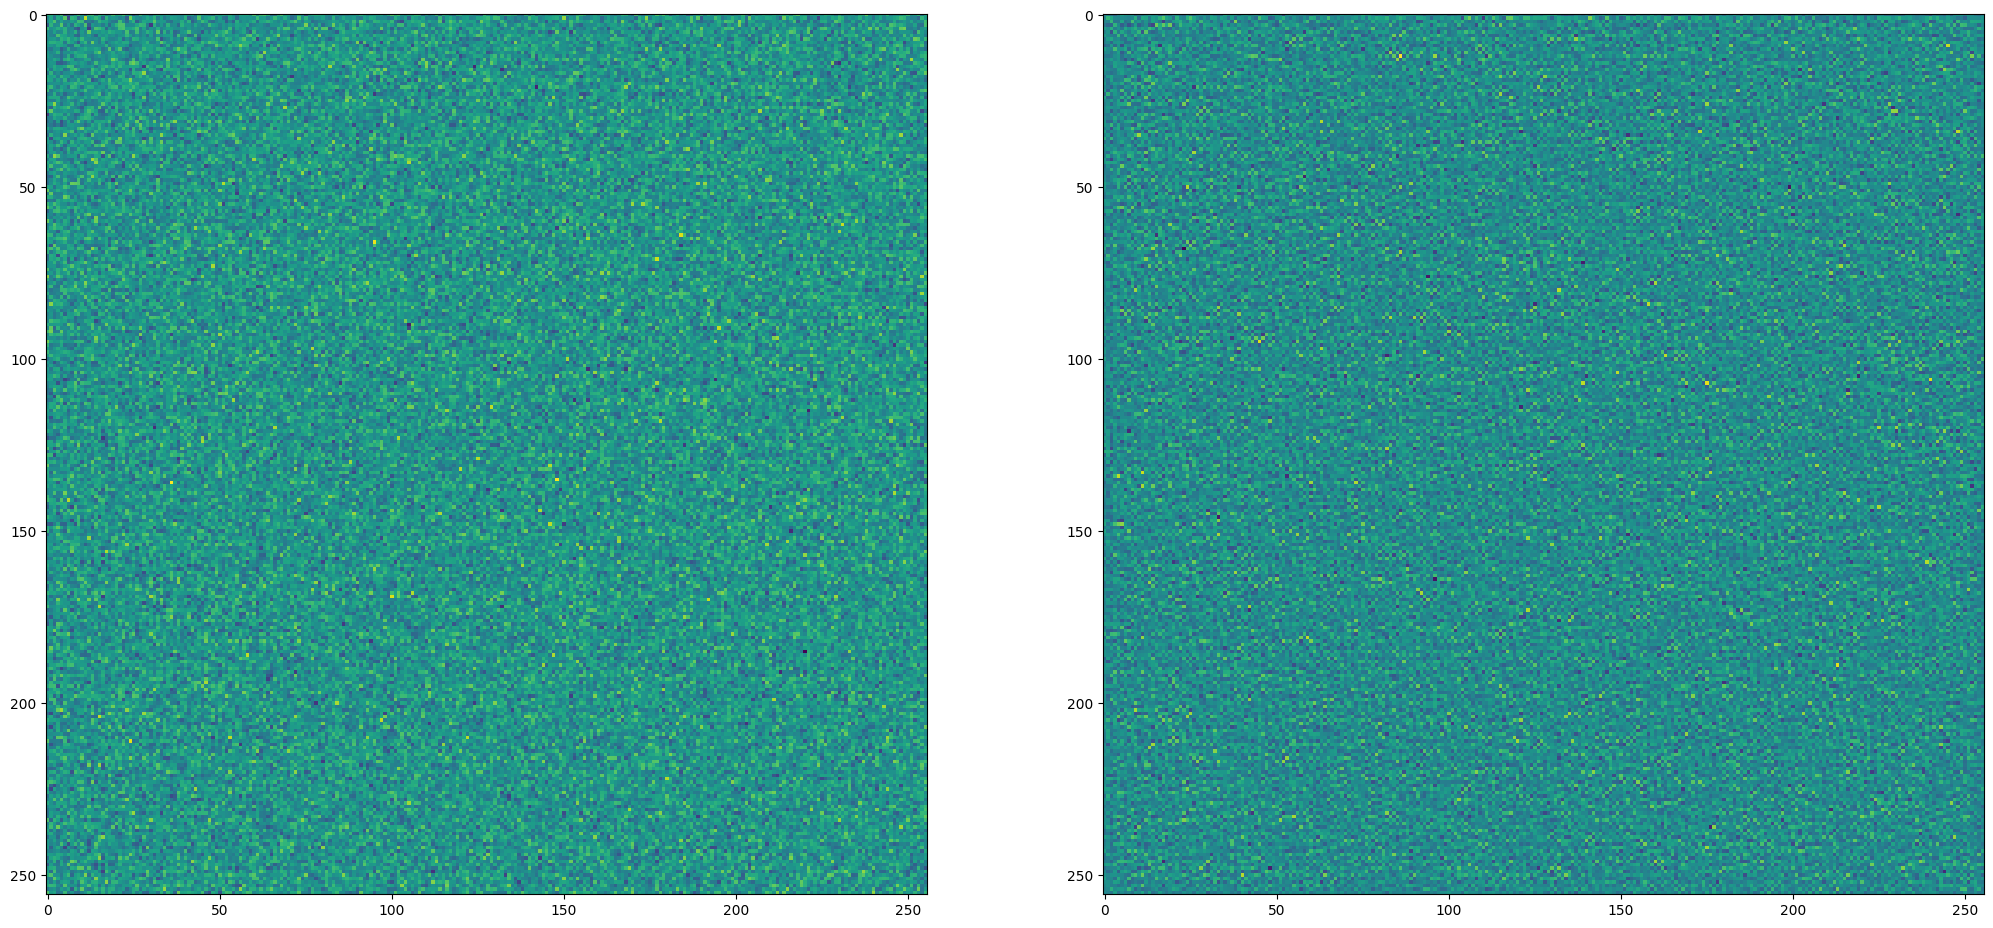

In [34]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
axe[0].imshow(img[0,0].cpu())
axe[1].imshow(pred[0,0].cpu().detach())

In [33]:
pred.shape

torch.Size([16, 1, 256, 256])